## 네이버 지식IN 을 통한 검색을 워드클라우드

- 물론 네이버 개발자 API를 이용하면 훨씬 빠르게 데이타를 가져올 수 있다

- 간단하게 주소창의 주소로 크롤링한다.

- 크롬 개발자모드에서 검색부분을 가져온다 ( 각 dl 태그 )


In [53]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time
from urllib.request import Request

%matplotlib inline

# 간단한 한글 폰드 등록
from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')


In [54]:
# 주소를 약간 수정함
# tmp1 = 'https://search.naver.com/search.naver?where=kin'
# html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'
html = 'https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query={key_word}&sm=tab_pge&srchby=all&st=sim&where=post&start={num}'
# html = 'https://search.naver.com/search.naver?where=article&ie=utf8&query={key_word}&prdtype=0&t=0&st=rel&date_option=0&date_from=&date_to=&srchby=text&dup_remove=1&cafe_url=&without_cafe_url=&board=&sm=tab_pge&start={num}'
# html = 'https://search.naver.com/search.naver?where=article&sm=tab_jum&query={key_word}&start={num}'
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('한식')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('div')

In [55]:
# 테스트로 첫번째 페이지의 텍스트만 가져온다
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:]

['',
 ' 메뉴 영역으로 바로가기 본문 영역으로 바로가기 ',
 '    NAVER   검색                     한글 입력기     function nx_ime_load_fail () { alert("네트워크 상태가 안 좋아 한영입력기를 불러오지 못했습니다.\\n잠시 후 다시 시도해 주세요."); } function nx_ime_load (elBtn) { if (window.nx_kbd_toggle) { nx_kbd_toggle(elBtn); return; } new $Ajax("https://ssl.pstatic.net/sstatic/au/pc/ime/ime.contents_170920.js", { type : "jsonp", timeout : 3, callbackid : "$get_ime", onload : function (res) { var oData = res.json(); if (oData) { var elStyle = $("_nx_kbd_style"); oData.ime_css += "#_nx_kbd .setkorhelp a { display:none; }" ; if (elStyle.styleSheet) { elStyle.styleSheet.cssText = oData.ime_css; } else { elStyle.innerHTML = oData.ime_css; } $("_nx_kbd").innerHTML = oData.ime_html; nx_js_lazyload("https://ssl.pstatic.net/sstatic/au/s/pc/_common/ime/nhn.ime_search_140825.js", function () { nx_kbd_toggle(elBtn); }); } else { nx_ime_load_fail(); } }, ontimeout : nx_ime_load_fail, onerror : nx_ime_load_fail }).request(); }   자동완성 펼치기  검색               시간대와 관심사

In [56]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1,100,10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('한식 메뉴')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(1)    
        

C:\Users\Canon\anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [57]:
len(present_candi_text)

130

In [58]:
# 만개의 글을 하나의 변수에 저장
import nltk
from konlpy.tag import Okt

okt = Okt()

present_text = ''
for each_line in present_candi_text[:100]:
    present_text = present_text + each_line + "\n"
    
    

In [59]:
# 형태소 분석
tokens_ko = okt.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '집들이',
 '음식',
 '실패',
 '확률',
 '없는',
 '한식',
 '메뉴',
 'Best',
 '5',
 '::',
 '유린',
 '기',
 '...',
 '2020.07',
 '.',
 '31',
 '.',
 '콥',
 '샐러드',
 '보다',
 '한식',
 '이랑',
 '잘',
 '어울려서',
 '많이',
 '들',
 '먹는',
 '메뉴',
 '다',
 '.',
 '이건',
 '진짜',
 '만들고',
 '치우는데',
 '5분',
 '도',
 '안',
 '걸려서',
 '완전',
 '강추',
 '.',
 '이렇게',
 '한',
 '상',
 '가득',
 '차려',
 '줬는데',
 '진짜',
 '진짜',
 '반응',
 '이',
 '좋았다',
 '....',
 '101',
 '번째',
 '타르트',
 'blog.naver.com/eggtta/222046834730',
 '블로그',
 '내',
 '검색',
 '영등포',
 '타임스퀘어',
 '맛집',
 ',',
 '한식',
 '맛집',
 '드호',
 '타임스퀘어',
 '점',
 '(',
 '메뉴',
 '...',
 '2020.08',
 '.',
 '03',
 '.',
 '

In [60]:
ko = nltk.Text(tokens_ko, name='한식 메뉴')
print(len(ko.tokens))
print(len(set(ko.tokens))) # 중복 제거

5412
1688


In [61]:
# 그중에서 많이 사용되는 단어 100개
ko.vocab().most_common(100)


[('한식', 242),
 ('.', 215),
 ('메뉴', 200),
 ('...', 183),
 ('검색', 104),
 ('블로그', 76),
 ('내', 73),
 ('의', 66),
 (',', 64),
 ('이', 56),
 ('가', 54),
 ('맛집', 48),
 ('를', 46),
 ('에', 44),
 ('약도', 42),
 ('단어', 40),
 ('로', 40),
 ('을', 39),
 ('/', 35),
 ('는', 35),
 ('들', 34),
 ('도', 32),
 ('한', 30),
 ('하는', 30),
 ('은', 27),
 ('입력', 24),
 ('~', 24),
 ('추천', 23),
 ('반찬', 23),
 ('!', 22),
 ('때', 21),
 ('종류', 21),
 ('으로', 19),
 ('포함', 18),
 ('곳', 18),
 ('집밥', 17),
 ('에서', 16),
 ('&', 15),
 ('와', 15),
 ("'", 15),
 ('인', 14),
 ('연관검색어', 14),
 ('1', 14),
 ('가격', 13),
 ('밥', 13),
 ('된', 12),
 ('할', 12),
 ('전', 12),
 ('있는', 12),
 ('오늘', 12),
 ('하나', 11),
 ('이상', 11),
 ('한식당', 11),
 ('?', 11),
 ('밥상', 11),
 ('+', 11),
 ('수', 11),
 ('원', 11),
 ('주', 11),
 ('집', 11),
 ('밑반찬', 11),
 ('기본', 10),
 ('기', 10),
 ('본', 10),
 ('여러', 10),
 ('해서', 10),
 ('-', 10),
 ('점심', 10),
 ('2020.04', 10),
 ('[', 10),
 ('과', 10),
 ('불고기', 10),
 ('사용', 9),
 ('합니다', 9),
 ('개', 9),
 ('2020.07', 9),
 ('잘', 9),
 ('다', 9),
 ('_', 9),


In [62]:
# 의미없는 단어들을 수동으로 제거해준다.
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','블로그','입력','검색']

tokens_ko = [each_word for each_word in tokens_ko 
                          if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='한식 메뉴')
ko.vocab().most_common(20)

[('한식', 242),
 ('메뉴', 200),
 ('내', 73),
 ('맛집', 48),
 ('약도', 42),
 ('/', 35),
 ('추천', 23),
 ('반찬', 23),
 ('!', 22),
 ('종류', 21),
 ('포함', 18),
 ('곳', 18),
 ('집밥', 17),
 ('에서', 16),
 ('&', 15),
 ('와', 15),
 ("'", 15),
 ('인', 14),
 ('연관검색어', 14),
 ('가격', 13)]

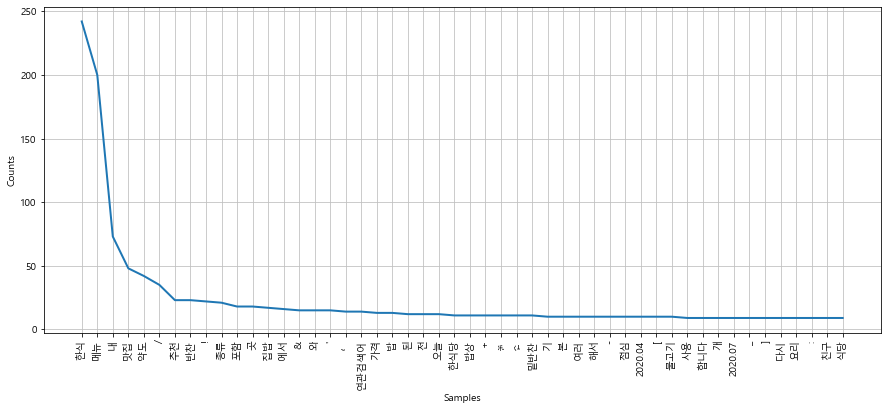

In [63]:
plt.figure(figsize=(15,6))
ko.plot(50)

In [64]:
# !pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

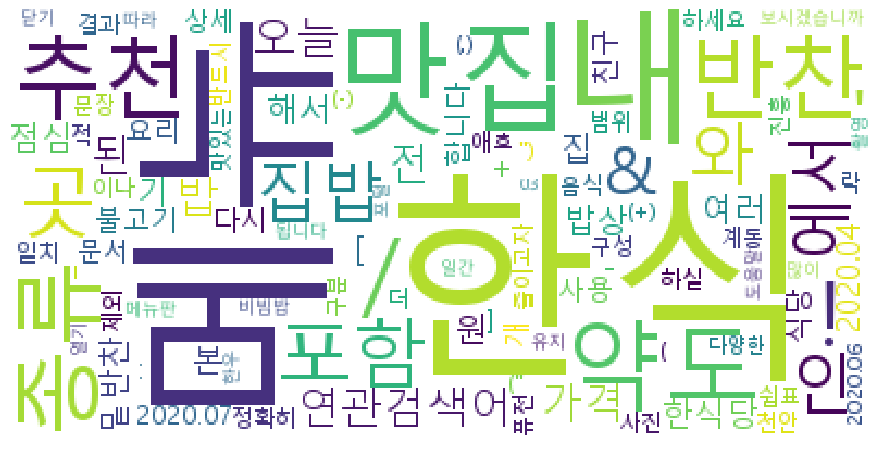

In [65]:
""" 워드 크라우드 그리기 """

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:\Windows\Fonts\malgun.ttf',relative_scaling=0.2,background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 766.5, 719.5, -0.5)

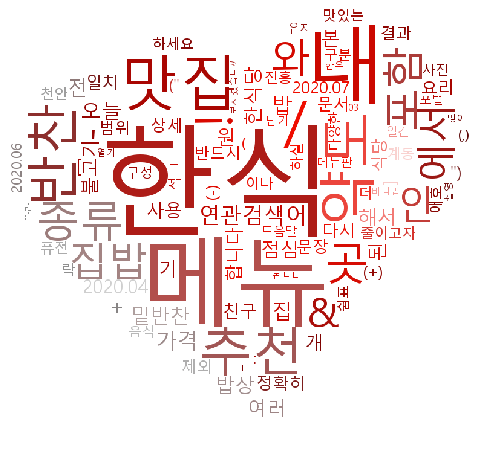

In [66]:
""" 이미지로 마스킹하여 워드 크라우드 그리기 """
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('./img/heart_image.jpg'))
image_colors = ImageColorGenerator(mask)

data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:\Windows\Fonts\malgun.ttf',relative_scaling=0.2,mask=mask,background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis('off')

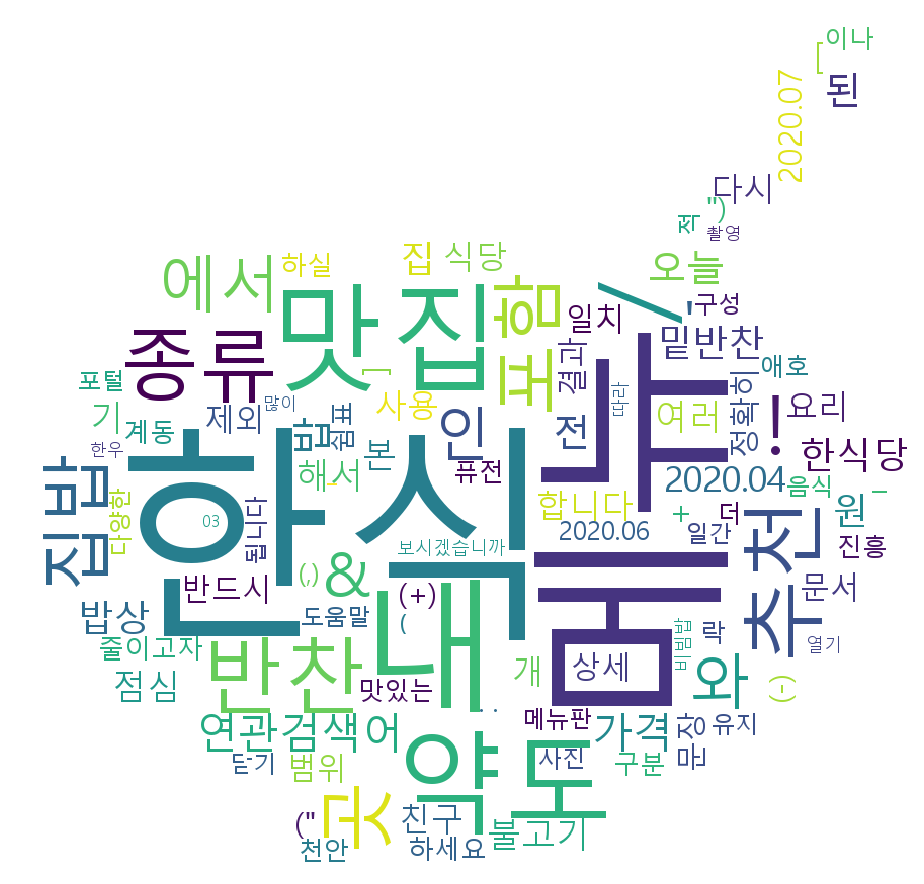

In [21]:
from PIL import Image

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib

matplotlib.rcParams['font.family'] = "Maulgun Gothic"
font_path = "c:/Windows/Fonts/malgun.ttf"

# denne_mask = np.array(Image.open('cloud.png'))
custom_mask = np.array (Image.open ( "images.png")) 
wc = WordCloud(font_path=font_path,mask=custom_mask, background_color="white", width=800, height=600)
cloud = wc.generate_from_frequencies(dict(data))
plt.figure(figsize = (20, 16))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('./file/wordcloud.png')